# Module 1 Get Started on GeoPandas

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

## Read from Dataset

In [ ]:
world.head()

In [ ]:
# Plot GeoDataFrame

world.plot()

## Read from Shapefile Data

In [ ]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [ ]:
countries.head()

In [ ]:
countries.plot()

## Read from GeoJSON Data

In [69]:
import requests
import json

wfs_url = "http://geo.ipisresearch.be/geoserver/public/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='public:cod_mines_curated_all_opendata_p_ipis', outputFormat='json')

r = requests.get(wfs_url, params=params)
data_features = json.loads(r.content.decode('UTF-8'))
data_visits = geopandas.GeoDataFrame.from_features(data_features)

## Indexing

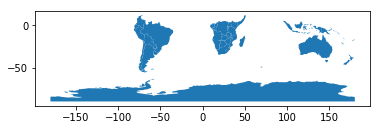

In [72]:
southern_world = world.cx[:, :0]
southern_world.plot()

## GeoDataFrame

In [ ]:
type(countries)

In [ ]:
countries.geometry

In [ ]:
type(countries.geometry)

In [ ]:
countries.geometry.area

In [ ]:
type(countries.geometry.area)

In [ ]:
countries['pop_est'].mean()

In [ ]:
africa = countries[countries['continent'] == 'Africa']

In [ ]:
africa.plot()

In [ ]:
countries.geometry[2]

In [ ]:
print(countries.geometry[2])

## Ex: Read File

In [ ]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [ ]:
cities.geometry[0]

In [ ]:
print(cities.geometry[0])

In [ ]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [ ]:
rivers.geometry[0]

In [ ]:
print(rivers.geometry[0])

## Shapely

In [54]:
from shapely.geometry import Point, Polygon, LineString

In [55]:
p = Point(1, 1)

In [56]:
print(p)

POINT (1 1)


In [57]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

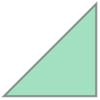

In [58]:
polygon

In [59]:
polygon.area

0.5

## Coordinate Reference System 

In [60]:
countries.crs

{'init': 'epsg:4326'}

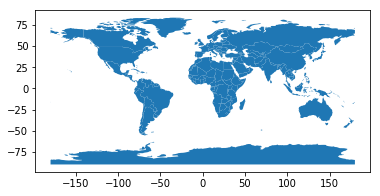

In [61]:
countries.plot()

In [62]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [63]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})

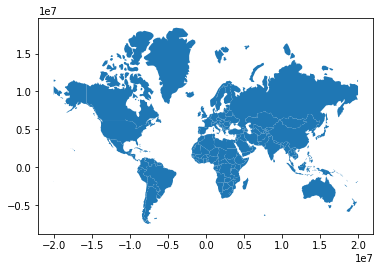

In [64]:
countries_mercator.plot()

## Overlaying Multiple Map Layers

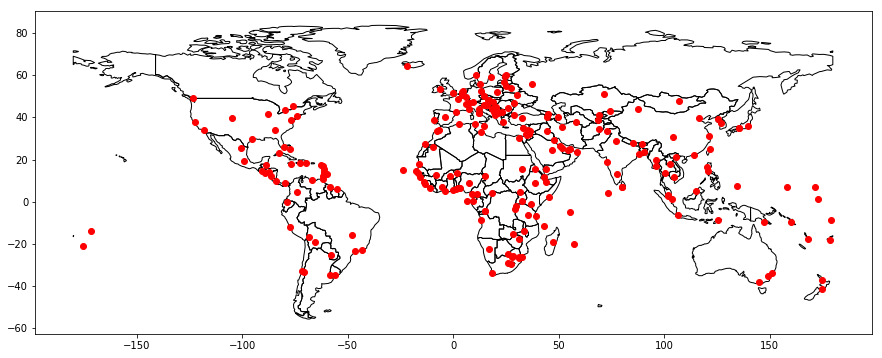

In [66]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax, color='red')


## Ex: Overlaying Multiple Map Layerss


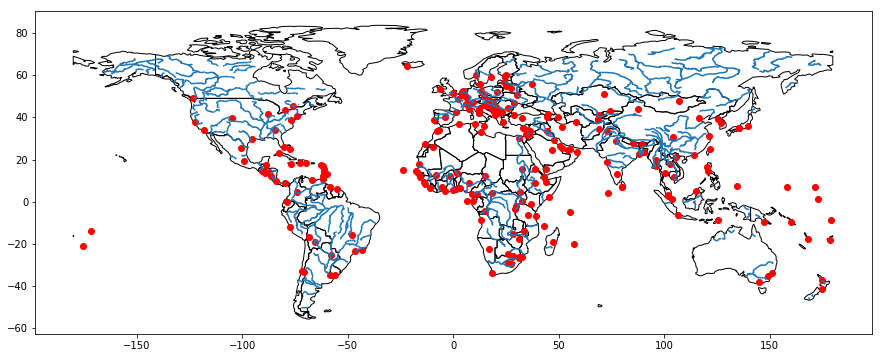

In [68]:

ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')

## Color Schmes

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd');

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

In [ ]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5)